In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002561
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


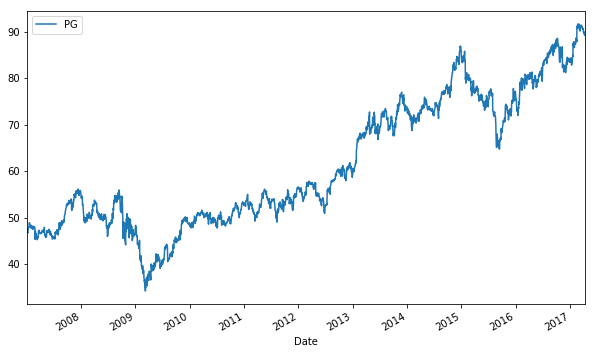

In [4]:
data.plot(figsize=(10, 6));

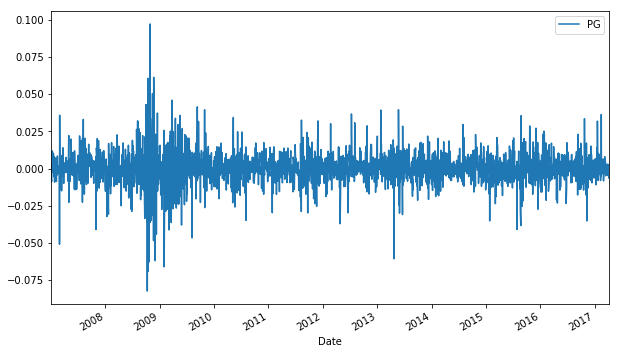

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([ 0.00018236])

In [13]:
drift.values

array([ 0.00018236])

In [14]:
stdev.values

array([ 0.0111381])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[ 0.86837673,  0.64121587],
       [ 0.35250561,  0.76738945],
       [ 0.56417914,  0.76087099],
       [ 0.8227844 ,  0.84426587],
       [ 0.19938002,  0.48545445],
       [ 0.19256769,  0.17927412],
       [ 0.74112595,  0.28645219],
       [ 0.54068474,  0.75853205],
       [ 0.21367244,  0.80188773],
       [ 0.92836315,  0.29874961]])

In [17]:
norm.ppf(x)

array([[ 1.11875061,  0.36171067],
       [-0.3785646 ,  0.73027664],
       [ 0.16157351,  0.7091071 ],
       [ 0.92602843,  1.01214599],
       [-0.84383782, -0.03646838],
       [-0.86847311, -0.91813491],
       [ 0.64682054, -0.56377924],
       [ 0.10215894,  0.70158838],
       [-0.79374333,  0.8483833 ],
       [ 1.46370816, -0.52800017]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.06864316,  0.46165842],
       [-1.608198  ,  1.5847175 ],
       [-2.28620036, -0.68382222],
       [-0.83235356, -0.61163297],
       [ 0.56875206, -0.64247376],
       [ 0.02273682,  0.15843913],
       [-2.31777044, -0.62447944],
       [-1.12842234,  0.84162461],
       [ 0.78017813,  1.82510123],
       [ 0.66502436,  0.995354  ]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[ 0.97303642,  0.97840622,  1.00789324, ...,  0.9907001 ,
         0.998585  ,  1.01371959],
       [ 1.0212853 ,  1.00158374,  1.00778714, ...,  0.99852295,
         1.00047002,  0.98616375],
       [ 1.014873  ,  1.00158135,  1.00964146, ...,  1.00443701,
         1.00555821,  0.99301348],
       ..., 
       [ 1.02379495,  0.9767779 ,  0.97499868, ...,  0.99758644,
         1.0121379 ,  1.01268496],
       [ 0.9967678 ,  1.02578401,  0.99373039, ...,  0.99437147,
         1.00354653,  1.0042182 ],
       [ 1.01287017,  0.99566178,  0.9811977 , ...,  0.99093491,
         0.99359816,  0.97974084]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    89.489998
Name: 2017-04-10 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [25]:
price_list[0] = S0
price_list

array([[ 89.489998,  89.489998,  89.489998, ...,  89.489998,  89.489998,
         89.489998],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[  89.489998  ,   89.489998  ,   89.489998  , ...,   89.489998  ,
          89.489998  ,   89.489998  ],
       [  91.39481931,   89.63172707,   90.18686916, ...,   89.35781712,
          89.53206007,   88.25179158],
       [  92.75413425,   89.77346583,   91.05640268, ...,   89.75429866,
          90.02969795,   87.63521903],
       ..., 
       [ 103.75544725,  160.47532431,   89.95735942, ...,   87.58142573,
         118.42781094,  161.60337685],
       [ 103.42008913,  164.61302111,   89.39336176, ...,   87.08847145,
         118.84781885,  162.28505283],
       [ 104.75112292,  163.89889345,   87.7125613 , ...,   86.29900685,
         118.08697415,  158.99729339]])

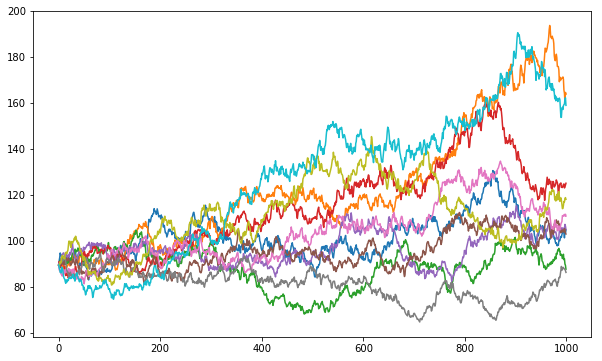

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);